In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
data_filepath = "C:/Users/reaga/documents/mdst_workshops/workshop3/HospitalAdmissionsData.csv";

In [4]:
data = pd.read_csv(data_filepath)

# Here are the column headers or 'features'
data.columns

Index(['ID', 'AdmissionLengthDays', 'Death_1', 'Admission_Type',
       'Insurance_Type', 'EnglishLanguage_1', 'Religion_Type', 'Married_1',
       'Race', 'Dx'],
      dtype='object')

In [5]:
data.info()

# We can see that 4 features are integer values, and only 1 is a float.
# The rest (5) are objects.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58863 entries, 0 to 58862
Data columns (total 10 columns):
ID                     58863 non-null int64
AdmissionLengthDays    58863 non-null float64
Death_1                58863 non-null int64
Admission_Type         58863 non-null object
Insurance_Type         58863 non-null object
EnglishLanguage_1      58863 non-null int64
Religion_Type          58408 non-null object
Married_1              58863 non-null int64
Race                   58863 non-null object
Dx                     58863 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 4.5+ MB


In [6]:
data["Insurance_Type"]
data.Insurance_Type.unique()

# The possible insurance type values are private, medicare
# medicaid, or self pay.

array(['private', 'medicare', 'government', 'medicaid', 'self pay'],
      dtype=object)

In [7]:
data["AdmissionLengthDays"].describe()

count    58863.000000
mean        10.138978
std         12.465611
min         -0.945139
25%          3.743056
50%          6.465972
75%         11.798264
max        294.660417
Name: AdmissionLengthDays, dtype: float64

In [8]:
stats.mode(data["Admission_Type"], axis=None)
# Mode: emergency
stats.mode(data["Insurance_Type"], axis=None)
# Mode: medicare
stats.mode(data["Religion_Type"], axis=None)
# Mode: catholic
stats.mode(data["Race"], axis=None)
# Mode: white
stats.mode(data["Dx"], axis=None)
# Mode: newborn

ModeResult(mode=array(['newborn'], dtype=object), count=array([7823]))

Text(0.5, 0, 'Number of Days')

<Figure size 432x288 with 0 Axes>

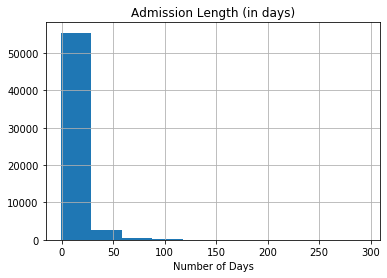

In [9]:
plt.tight_layout()
data.hist(column="AdmissionLengthDays")
plt.title("Admission Length (in days)")
plt.xlabel("Number of Days")

Text(0.5, 0, '# days')

<Figure size 432x288 with 0 Axes>

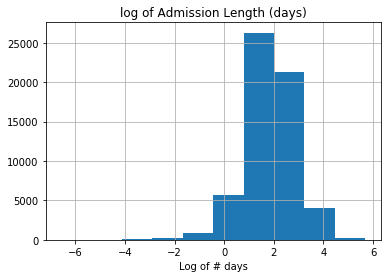

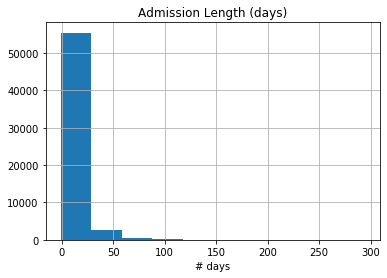

In [10]:
def log_days(num_days):
    return np.log(num_days)

plt.tight_layout()
data["Log_days"] = data["AdmissionLengthDays"].apply(log_days)
data.hist(column="Log_days", sharex=True)
plt.title("log of Admission Length (days)")
plt.xlabel("Log of # days")
data.hist(column="AdmissionLengthDays", sharex=True)
plt.title("Admission Length (days)")
plt.xlabel("# days")

# taking the log of the number of days essentially symmetrizes 
# the data around 2 with a relatively small spread

Text(0.5, 0.04, 'Days')

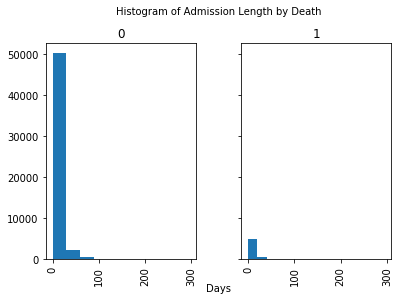

In [14]:
fig, axes = plt.subplots(1,2, sharex=True, sharey=True)

data.hist(column="AdmissionLengthDays", by=data.Death_1, ax=axes)

fig.text(0.5, 1, "Histogram of Admission Length by Death", ha="center")
fig.text(0.5, 0.04, "Days", ha="center")

In [22]:
data.plot(kind="scatter", x = data.groupby("Insurance_Type"), y = "Death_1")

ValueError: cannot copy sequence with size 1781 to array axis with dimension 11